In [ ]:
# Eliminar advertencias
import warnings
warnings.filterwarnings('ignore')

# Importar librerias
import numpy as np
import pandas as pd

# leer archivo y mostrar datos
parkinson = pd.read_csv("parkinson.csv")
parkinson

In [2]:
# Revisar nulos
print(parkinson.info())

    # Revisar atipicos
print(parkinson.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject        5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [3]:
from sklearn.model_selection import train_test_split

# Configuracion inicial
np.random.seed(0)
df_train, df_test = train_test_split(parkinson, train_size = 0.7, test_size = 0.3, random_state = 100)

In [4]:
#Los valores son pequeños menos el area, entonces no estan en igual escala
from sklearn.preprocessing import MinMaxScaler
#Este minmax scaler es muy bueno, tambien hay unos con promedios y otros escalares
scaler = MinMaxScaler()

# Se aplica a todas las columnas menos a las dummies y a las si/no que discutimos arriba
num_vars = ['subject', 'age', 'sex', 'test_time', 'motor_UPDRS','total_UPDRS',
            'Jitter(%)', 'Jitter(Abs)','Jitter:RAP','Jitter:PPQ5','Jitter:DDP',
            'Shimmer', 'Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:APQ11',
            'Shimmer:DDA','NHR','HNR','RPDE','DFA','PPE' ]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train

,subject,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
4933,0.853659,0.530612,1.0,0.489517,0.590408,0.520920,0.136451,0.158614,0.125346,0.171273,...,0.449303,0.361232,0.403501,0.346088,0.361232,0.236337,0.278634,0.605889,0.286910,0.596547
2110,0.341463,0.591837,0.0,0.139878,0.124441,0.137919,0.043021,0.058240,0.042274,0.040838,...,0.215762,0.178194,0.177369,0.145614,0.178194,0.033298,0.518279,0.457108,0.312464,0.194449
2435,0.414634,0.591837,0.0,0.740071,0.002898,0.000000,0.042919,0.071773,0.030644,0.034325,...,0.155214,0.112132,0.142173,0.129875,0.112132,0.023280,0.600425,0.400311,0.445011,0.272338
4972,0.853659,0.530612,1.0,0.316763,0.554119,0.487685,0.243243,0.263184,0.190142,0.314733,...,0.746276,0.462685,0.693361,0.474818,0.462664,0.419739,0.153661,0.595284,0.175484,0.750759
3049,0.536585,0.469388,1.0,0.381172,0.272567,0.406109,0.035125,0.047300,0.039690,0.038021,...,0.105718,0.080964,0.100254,0.099052,0.080964,0.006479,0.596725,0.176510,0.686435,0.195197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,0.317073,0.448980,1.0,0.499027,0.263111,0.255584,0.024901,0.035503,0.019753,0.014610,...,0.052859,0.041103,0.043191,0.034012,0.041082,0.014480,0.692401,0.193447,0.332165,0.139882
350,0.048780,0.428571,0.0,0.307435,0.631222,0.506959,0.025610,0.048653,0.021968,0.012674,...,0.031235,0.016329,0.019263,0.022566,0.016329,0.014505,0.782306,0.346191,0.138573,0.126075
79,0.000000,0.734694,0.0,0.204396,0.707716,0.622395,0.028444,0.038007,0.024737,0.030628,...,0.086497,0.049795,0.065059,0.058949,0.049774,0.020769,0.693671,0.316749,0.085699,0.197230
3927,0.682927,0.857143,0.0,0.057606,0.653007,0.570262,0.038668,0.066788,0.029352,0.037317,...,0.101394,0.048615,0.061001,0.071172,0.048595,0.020755,0.577065,0.355176,0.334685,0.250328


In [5]:
# Dividimos x/y
y_train = df_train.pop('total_UPDRS')
X_train = df_train

In [6]:
#Construimos el modelo completo con TODAS las variables

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm)
result1 = lr_1.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1929.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:44:20   Log-Likelihood:                 5295.5
No. Observations:                4112   AIC:                        -1.055e+04
Df Residuals:                    4090   BIC:                        -1.040e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0340      0.018      1.873      0.061      -0.002       0.070
subject           0.0407      0.004     10.232      0.000       0.033       0.049
age               0.0821      0.006     13.126      0.000       0.070       0.094
sex              -0.0365      0.003    -13.294      0.000      -0.042      -0.031
test_time         0.0122      0.004      2.804      0.005       0.004       0.021
motor_UPDRS       0.8686      0.005    174.689      0.000       0.859       0.878
Jitter(%)        -0.8886      0.187     -4.748      0.000      -1.256      -0.522
Jitter(Abs)       0.2028      0.038      5.360      0.000       0.129       0.277
Jitter:RAP       24.3709     20.804      1.171      0.241     -16.417      65.158
Jitter:PPQ5       0.0684      0.095      0.720      0.472      -0.118       0.255
Jitter:DDP      -23.7777     20.804     -1.143      0.253     -64.564      17.009
Shimmer          -0.3257      0.140     -2.329      0.020      -0.600      -0.052
Shimmer(dB)       0.0262      0.083      0.317      0.751      -0.136       0.189
Shimmer:APQ3    -50.1219     61.968     -0.809      0.419    -171.613      71.369
Shimmer:APQ5      0.4393      0.081      5.432      0.000       0.281       0.598
Shimmer:APQ11    -0.2434      0.053     -4.628      0.000      -0.347      -0.140
Shimmer:DDA      50.0849     61.968      0.808      0.419     -71.406     171.576
NHR              -0.0112      0.039     -0.290      0.772      -0.087       0.065
HNR              -0.0592      0.021     -2.868      0.004      -0.100      -0.019
RPDE              0.0404      0.011      3.596      0.000       0.018       0.062
DFA              -0.0200      0.007     -2.961      0.003      -0.033      -0.007
PPE              -0.0490      0.017     -2.868      0.004      -0.083      -0.016
==============================================================================
Omnibus:                      449.472   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              632.619
Skew:                           0.849   Prob(JB):                    4.25e-138
Kurtosis:                       3.899   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# Eliminamos semi-furnished
X = X_train.drop('NHR', 1,)

# Construimos de nuevo el modelo sin esta variable
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm)
result2 = lr_2.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     2021.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:44:24   Log-Likelihood:                 5295.5
No. Observations:                4112   AIC:                        -1.055e+04
Df Residuals:                    4091   BIC:                        -1.041e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0333      0.018      1.851      0.064      -0.002       0.069
subject           0.0406      0.004     10.235      0.000       0.033       0.048
age               0.0824      0.006     13.259      0.000       0.070       0.095
sex              -0.0367      0.003    -13.568      0.000      -0.042      -0.031
test_time         0.0121      0.004      2.799      0.005       0.004       0.021
motor_UPDRS       0.8687      0.005    174.937      0.000       0.859       0.878
Jitter(%)        -0.8900      0.187     -4.757      0.000      -1.257      -0.523
Jitter(Abs)       0.2003      0.037      5.430      0.000       0.128       0.273
Jitter:RAP       24.3591     20.802      1.171      0.242     -16.424      65.142
Jitter:PPQ5       0.0609      0.091      0.666      0.505      -0.118       0.240
Jitter:DDP      -23.7634     20.801     -1.142      0.253     -64.545      17.019
Shimmer          -0.3324      0.138     -2.410      0.016      -0.603      -0.062
Shimmer(dB)       0.0239      0.082      0.289      0.772      -0.138       0.185
Shimmer:APQ3    -50.3847     61.954     -0.813      0.416    -171.849      71.079
Shimmer:APQ5      0.4374      0.081      5.427      0.000       0.279       0.595
Shimmer:APQ11    -0.2414      0.052     -4.631      0.000      -0.344      -0.139
Shimmer:DDA      50.3559     61.954      0.813      0.416     -71.107     171.819
HNR              -0.0583      0.020     -2.858      0.004      -0.098      -0.018
RPDE              0.0403      0.011      3.595      0.000       0.018       0.062
DFA              -0.0192      0.006     -3.122      0.002      -0.031      -0.007
PPE              -0.0482      0.017     -2.861      0.004      -0.081      -0.015
==============================================================================
Omnibus:                      450.733   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              634.714
Skew:                           0.851   Prob(JB):                    1.49e-138
Kurtosis:                       3.899   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
X = X.drop('Shimmer(dB)', 1)

# Construimos de nuevo el modelo sin esta variable
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm)
result3 = lr_3.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     2123.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:44:26   Log-Likelihood:                 5295.4
No. Observations:                4112   AIC:                        -1.055e+04
Df Residuals:                    4092   BIC:                        -1.042e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0334      0.018      1.859      0.063      -0.002       0.069
subject           0.0406      0.004     10.238      0.000       0.033       0.048
age               0.0824      0.006     13.262      0.000       0.070       0.095
sex              -0.0367      0.003    -13.566      0.000      -0.042      -0.031
test_time         0.0122      0.004      2.808      0.005       0.004       0.021
motor_UPDRS       0.8687      0.005    174.956      0.000       0.859       0.878
Jitter(%)        -0.8831      0.186     -4.760      0.000      -1.247      -0.519
Jitter(Abs)       0.1998      0.037      5.423      0.000       0.128       0.272
Jitter:RAP       24.3502     20.799      1.171      0.242     -16.428      65.128
Jitter:PPQ5       0.0571      0.090      0.631      0.528      -0.120       0.235
Jitter:DDP      -23.7564     20.799     -1.142      0.253     -64.534      17.021
Shimmer          -0.3064      0.105     -2.926      0.003      -0.512      -0.101
Shimmer:APQ3    -50.7442     61.935     -0.819      0.413    -172.170      70.682
Shimmer:APQ5      0.4383      0.081      5.444      0.000       0.280       0.596
Shimmer:APQ11    -0.2399      0.052     -4.626      0.000      -0.342      -0.138
Shimmer:DDA      50.7136     61.935      0.819      0.413     -70.712     172.139
HNR              -0.0584      0.020     -2.860      0.004      -0.098      -0.018
RPDE              0.0402      0.011      3.585      0.000       0.018       0.062
DFA              -0.0194      0.006     -3.206      0.001      -0.031      -0.008
PPE              -0.0473      0.017     -2.855      0.004      -0.080      -0.015
==============================================================================
Omnibus:                      448.891   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.235
Skew:                           0.849   Prob(JB):                    8.49e-138
Kurtosis:                       3.895   Cond. No.                     1.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
X = X.drop('Jitter:PPQ5', 1)

# Construimos de nuevo el modelo sin esta variable
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm)
result4 = lr_4.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     2235.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:45:51   Log-Likelihood:                 5295.2
No. Observations:                4112   AIC:                        -1.055e+04
Df Residuals:                    4093   BIC:                        -1.042e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0344      0.018      1.922      0.055      -0.001       0.070
subject           0.0405      0.004     10.232      0.000       0.033       0.048
age               0.0824      0.006     13.262      0.000       0.070       0.095
sex              -0.0367      0.003    -13.588      0.000      -0.042      -0.031
test_time         0.0122      0.004      2.828      0.005       0.004       0.021
motor_UPDRS       0.8686      0.005    174.974      0.000       0.859       0.878
Jitter(%)        -0.8134      0.149     -5.456      0.000      -1.106      -0.521
Jitter(Abs)       0.1946      0.036      5.418      0.000       0.124       0.265
Jitter:RAP       23.9075     20.786      1.150      0.250     -16.845      64.660
Jitter:DDP      -23.3200     20.786     -1.122      0.262     -64.072      17.432
Shimmer          -0.2994      0.104     -2.876      0.004      -0.503      -0.095
Shimmer:APQ3    -50.0542     61.921     -0.808      0.419    -171.452      71.344
Shimmer:APQ5      0.4621      0.071      6.493      0.000       0.323       0.602
Shimmer:APQ11    -0.2511      0.049     -5.153      0.000      -0.347      -0.156
Shimmer:DDA      50.0020     61.920      0.808      0.419     -71.394     171.399
HNR              -0.0596      0.020     -2.934      0.003      -0.099      -0.020
RPDE              0.0394      0.011      3.536      0.000       0.018       0.061
DFA              -0.0195      0.006     -3.214      0.001      -0.031      -0.008
PPE              -0.0482      0.017     -2.920      0.004      -0.081      -0.016
==============================================================================
Omnibus:                      447.324   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.881
Skew:                           0.846   Prob(JB):                    2.76e-137
Kurtosis:                       3.897   Cond. No.                     1.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
X = X.drop('Shimmer:APQ3', 1)

# Construimos de nuevo el modelo sin esta variable
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm)
result5 = lr_5.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     2359.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:46:41   Log-Likelihood:                 5294.9
No. Observations:                4112   AIC:                        -1.055e+04
Df Residuals:                    4094   BIC:                        -1.043e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0336      0.018      1.878      0.060      -0.001       0.069
subject           0.0405      0.004     10.230      0.000       0.033       0.048
age               0.0824      0.006     13.272      0.000       0.070       0.095
sex              -0.0367      0.003    -13.590      0.000      -0.042      -0.031
test_time         0.0123      0.004      2.838      0.005       0.004       0.021
motor_UPDRS       0.8686      0.005    174.981      0.000       0.859       0.878
Jitter(%)        -0.8113      0.149     -5.443      0.000      -1.104      -0.519
Jitter(Abs)       0.1940      0.036      5.402      0.000       0.124       0.264
Jitter:RAP       23.9839     20.785      1.154      0.249     -16.766      64.734
Jitter:DDP      -23.3976     20.785     -1.126      0.260     -64.147      17.352
Shimmer          -0.3003      0.104     -2.885      0.004      -0.504      -0.096
Shimmer:APQ5      0.4628      0.071      6.504      0.000       0.323       0.602
Shimmer:APQ11    -0.2517      0.049     -5.166      0.000      -0.347      -0.156
Shimmer:DDA      -0.0515      0.084     -0.615      0.539      -0.216       0.113
HNR              -0.0599      0.020     -2.948      0.003      -0.100      -0.020
RPDE              0.0391      0.011      3.515      0.000       0.017       0.061
DFA              -0.0194      0.006     -3.196      0.001      -0.031      -0.007
PPE              -0.0482      0.017     -2.921      0.004      -0.081      -0.016
==============================================================================
Omnibus:                      449.236   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              632.383
Skew:                           0.849   Prob(JB):                    4.78e-138
Kurtosis:                       3.900   Cond. No.                     4.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
X = X.drop('Shimmer:DDA', 1)

# Construimos de nuevo el modelo sin esta variable
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm)
result6 = lr_6.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     2499.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:47:22   Log-Likelihood:                 5294.7
No. Observations:                4112   AIC:                        -1.055e+04
Df Residuals:                    4095   BIC:                        -1.044e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0329      0.018      1.844      0.065      -0.002       0.068
subject           0.0406      0.004     10.276      0.000       0.033       0.048
age               0.0822      0.006     13.260      0.000       0.070       0.094
sex              -0.0366      0.003    -13.589      0.000      -0.042      -0.031
test_time         0.0122      0.004      2.821      0.005       0.004       0.021
motor_UPDRS       0.8686      0.005    174.994      0.000       0.859       0.878
Jitter(%)        -0.7702      0.133     -5.782      0.000      -1.031      -0.509
Jitter(Abs)       0.1913      0.036      5.367      0.000       0.121       0.261
Jitter:RAP       23.9400     20.783      1.152      0.249     -16.807      64.687
Jitter:DDP      -23.3842     20.783     -1.125      0.261     -64.131      17.362
Shimmer          -0.3461      0.073     -4.754      0.000      -0.489      -0.203
Shimmer:APQ5      0.4534      0.069      6.525      0.000       0.317       0.590
Shimmer:APQ11    -0.2382      0.044     -5.476      0.000      -0.324      -0.153
HNR              -0.0591      0.020     -2.916      0.004      -0.099      -0.019
RPDE              0.0396      0.011      3.568      0.000       0.018       0.061
DFA              -0.0196      0.006     -3.253      0.001      -0.031      -0.008
PPE              -0.0491      0.016     -2.983      0.003      -0.081      -0.017
==============================================================================
Omnibus:                      448.564   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.401
Skew:                           0.848   Prob(JB):                    7.82e-138
Kurtosis:                       3.901   Cond. No.                     4.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
X = X.drop('Jitter:DDP', 1)
# Construimos de nuevo el modelo sin esta variable
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm)
result7 = lr_7.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     2654.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:48:22   Log-Likelihood:                 5294.1
No. Observations:                4112   AIC:                        -1.055e+04
Df Residuals:                    4096   BIC:                        -1.045e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0337      0.018      1.891      0.059      -0.001       0.069
subject           0.0406      0.004     10.269      0.000       0.033       0.048
age               0.0823      0.006     13.274      0.000       0.070       0.094
sex              -0.0365      0.003    -13.567      0.000      -0.042      -0.031
test_time         0.0122      0.004      2.813      0.005       0.004       0.021
motor_UPDRS       0.8685      0.005    175.005      0.000       0.859       0.878
Jitter(%)        -0.7740      0.133     -5.813      0.000      -1.035      -0.513
Jitter(Abs)       0.1917      0.036      5.378      0.000       0.122       0.262
Jitter:RAP        0.5562      0.125      4.439      0.000       0.311       0.802
Shimmer          -0.3475      0.073     -4.774      0.000      -0.490      -0.205
Shimmer:APQ5      0.4556      0.069      6.560      0.000       0.319       0.592
Shimmer:APQ11    -0.2391      0.044     -5.497      0.000      -0.324      -0.154
HNR              -0.0584      0.020     -2.881      0.004      -0.098      -0.019
RPDE              0.0400      0.011      3.606      0.000       0.018       0.062
DFA              -0.0196      0.006     -3.250      0.001      -0.031      -0.008
PPE              -0.0489      0.016     -2.972      0.003      -0.081      -0.017
==============================================================================
Omnibus:                      448.789   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.907
Skew:                           0.848   Prob(JB):                    6.07e-138
Kurtosis:                       3.902   Cond. No.                         302.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculo final de VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Shimmer,113.25
9,Shimmer:APQ5,97.84
5,Jitter(%),95.82
7,Jitter:RAP,78.50
10,Shimmer:APQ11,29.65
14,PPE,20.73
12,RPDE,18.26
6,Jitter(Abs),17.92
11,HNR,14.14
1,age,12.87


In [14]:
X = X.drop('Shimmer', 1)
# Construimos de nuevo el modelo sin esta variable
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm)
result8 = lr_8.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     2815.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:51:10   Log-Likelihood:                 5282.7
No. Observations:                4112   AIC:                        -1.053e+04
Df Residuals:                    4097   BIC:                        -1.043e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0301      0.018      1.685      0.092      -0.005       0.065
subject           0.0399      0.004     10.058      0.000       0.032       0.048
age               0.0812      0.006     13.079      0.000       0.069       0.093
sex              -0.0364      0.003    -13.487      0.000      -0.042      -0.031
test_time         0.0116      0.004      2.678      0.007       0.003       0.020
motor_UPDRS       0.8687      0.005    174.571      0.000       0.859       0.878
Jitter(%)        -0.5993      0.128     -4.668      0.000      -0.851      -0.348
Jitter(Abs)       0.1753      0.036      4.928      0.000       0.106       0.245
Jitter:RAP        0.3712      0.119      3.107      0.002       0.137       0.605
Shimmer:APQ5      0.1757      0.037      4.709      0.000       0.103       0.249
Shimmer:APQ11    -0.2843      0.043     -6.677      0.000      -0.368      -0.201
HNR              -0.0551      0.020     -2.714      0.007      -0.095      -0.015
RPDE              0.0379      0.011      3.412      0.001       0.016       0.060
DFA              -0.0159      0.006     -2.650      0.008      -0.028      -0.004
PPE              -0.0544      0.016     -3.308      0.001      -0.087      -0.022
==============================================================================
Omnibus:                      455.517   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              643.043
Skew:                           0.857   Prob(JB):                    2.32e-140
Kurtosis:                       3.902   Cond. No.                         283.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X = X.drop('DFA', 1)

# Construimos de nuevo el modelo sin esta variable
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm)
result9 = lr_9.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     3011.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:52:23   Log-Likelihood:                 5279.2
No. Observations:                4112   AIC:                        -1.053e+04
Df Residuals:                    4098   BIC:                        -1.043e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0193      0.017      1.111      0.267      -0.015       0.053
subject           0.0385      0.004      9.794      0.000       0.031       0.046
age               0.0830      0.006     13.449      0.000       0.071       0.095
sex              -0.0355      0.003    -13.252      0.000      -0.041      -0.030
test_time         0.0114      0.004      2.628      0.009       0.003       0.020
motor_UPDRS       0.8712      0.005    178.362      0.000       0.862       0.881
Jitter(%)        -0.5703      0.128     -4.456      0.000      -0.821      -0.319
Jitter(Abs)       0.1627      0.035      4.611      0.000       0.094       0.232
Jitter:RAP        0.3571      0.119      2.990      0.003       0.123       0.591
Shimmer:APQ5      0.1896      0.037      5.130      0.000       0.117       0.262
Shimmer:APQ11    -0.2951      0.042     -6.957      0.000      -0.378      -0.212
HNR              -0.0492      0.020     -2.438      0.015      -0.089      -0.010
RPDE              0.0417      0.011      3.786      0.000       0.020       0.063
PPE              -0.0635      0.016     -3.945      0.000      -0.095      -0.032
==============================================================================
Omnibus:                      440.665   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              621.299
Skew:                           0.833   Prob(JB):                    1.22e-135
Kurtosis:                       3.922   Cond. No.                         274.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X = X.drop('HNR', 1)

# Construimos de nuevo el modelo sin esta variable
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm)
result10 = lr_10.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     3238.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:52:57   Log-Likelihood:                 5276.2
No. Observations:                4112   AIC:                        -1.052e+04
Df Residuals:                    4099   BIC:                        -1.044e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0208      0.006     -3.638      0.000      -0.032      -0.010
subject           0.0394      0.004     10.046      0.000       0.032       0.047
age               0.0831      0.006     13.450      0.000       0.071       0.095
sex              -0.0349      0.003    -13.077      0.000      -0.040      -0.030
test_time         0.0111      0.004      2.568      0.010       0.003       0.020
motor_UPDRS       0.8717      0.005    178.492      0.000       0.862       0.881
Jitter(%)        -0.6251      0.126     -4.958      0.000      -0.872      -0.378
Jitter(Abs)       0.1725      0.035      4.917      0.000       0.104       0.241
Jitter:RAP        0.3983      0.118      3.367      0.001       0.166       0.630
Shimmer:APQ5      0.2167      0.035      6.139      0.000       0.147       0.286
Shimmer:APQ11    -0.2927      0.042     -6.900      0.000      -0.376      -0.210
RPDE              0.0522      0.010      5.136      0.000       0.032       0.072
PPE              -0.0485      0.015     -3.259      0.001      -0.078      -0.019
==============================================================================
Omnibus:                      453.665   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              645.063
Skew:                           0.849   Prob(JB):                    8.44e-141
Kurtosis:                       3.941   Cond. No.                         256.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X = X.drop('test_time', 1)
# Construimos de nuevo el modelo sin esta variable
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm)
result11 = lr_11.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     3503.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:53:34   Log-Likelihood:                 5272.9
No. Observations:                4112   AIC:                        -1.052e+04
Df Residuals:                    4100   BIC:                        -1.044e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0159      0.005     -2.947      0.003      -0.026      -0.005
subject           0.0393      0.004     10.013      0.000       0.032       0.047
age               0.0833      0.006     13.475      0.000       0.071       0.095
sex              -0.0348      0.003    -13.037      0.000      -0.040      -0.030
motor_UPDRS       0.8725      0.005    178.871      0.000       0.863       0.882
Jitter(%)        -0.6090      0.126     -4.833      0.000      -0.856      -0.362
Jitter(Abs)       0.1752      0.035      4.992      0.000       0.106       0.244
Jitter:RAP        0.3797      0.118      3.213      0.001       0.148       0.611
Shimmer:APQ5      0.2165      0.035      6.130      0.000       0.147       0.286
Shimmer:APQ11    -0.2946      0.042     -6.939      0.000      -0.378      -0.211
RPDE              0.0512      0.010      5.033      0.000       0.031       0.071
PPE              -0.0483      0.015     -3.243      0.001      -0.078      -0.019
==============================================================================
Omnibus:                      452.751   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              643.886
Skew:                           0.847   Prob(JB):                    1.52e-140
Kurtosis:                       3.943   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Calculo final de VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Jitter(%),86.47
6,Jitter:RAP,69.99
8,Shimmer:APQ11,27.52
7,Shimmer:APQ5,25.41
10,PPE,18.47
5,Jitter(Abs),17.19
9,RPDE,15.05
1,age,9.32
3,motor_UPDRS,5.92
0,subject,4.70


In [19]:
X = X.drop('Jitter(%)', 1)

# Construimos de nuevo el modelo sin esta variable
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm)
result12 = lr_12.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     3798.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:54:50   Log-Likelihood:                 5261.2
No. Observations:                4112   AIC:                        -1.050e+04
Df Residuals:                    4101   BIC:                        -1.042e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0138      0.005     -2.557      0.011      -0.024      -0.003
subject           0.0384      0.004      9.765      0.000       0.031       0.046
age               0.0840      0.006     13.557      0.000       0.072       0.096
sex              -0.0343      0.003    -12.829      0.000      -0.040      -0.029
motor_UPDRS       0.8727      0.005    178.445      0.000       0.863       0.882
Jitter(Abs)       0.1597      0.035      4.560      0.000       0.091       0.228
Jitter:RAP       -0.1482      0.045     -3.278      0.001      -0.237      -0.060
Shimmer:APQ5      0.2071      0.035      5.856      0.000       0.138       0.276
Shimmer:APQ11    -0.3050      0.043     -7.174      0.000      -0.388      -0.222
RPDE              0.0500      0.010      4.911      0.000       0.030       0.070
PPE              -0.0673      0.014     -4.673      0.000      -0.096      -0.039
==============================================================================
Omnibus:                      463.565   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              676.280
Skew:                           0.847   Prob(JB):                    1.40e-147
Kurtosis:                       4.037   Cond. No.                         86.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Calculo final de VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Shimmer:APQ11,27.41
6,Shimmer:APQ5,25.35
9,PPE,17.27
4,Jitter(Abs),17.04
8,RPDE,15.04
5,Jitter:RAP,10.21
1,age,9.26
3,motor_UPDRS,5.92
0,subject,4.70
2,sex,2.00


In [21]:
X = X.drop('Shimmer:APQ11', 1)

# Construimos de nuevo el modelo sin esta variable
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm)
result13 = lr_13.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     4122.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:55:35   Log-Likelihood:                 5235.6
No. Observations:                4112   AIC:                        -1.045e+04
Df Residuals:                    4102   BIC:                        -1.038e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0083      0.005     -1.557      0.120      -0.019       0.002
subject          0.0354      0.004      9.007      0.000       0.028       0.043
age              0.0791      0.006     12.770      0.000       0.067       0.091
sex             -0.0343      0.003    -12.725      0.000      -0.040      -0.029
motor_UPDRS      0.8707      0.005    177.244      0.000       0.861       0.880
Jitter(Abs)      0.1429      0.035      4.064      0.000       0.074       0.212
Jitter:RAP      -0.0698      0.044     -1.581      0.114      -0.156       0.017
Shimmer:APQ5    -0.0237      0.015     -1.601      0.109      -0.053       0.005
RPDE             0.0442      0.010      4.330      0.000       0.024       0.064
PPE             -0.0868      0.014     -6.092      0.000      -0.115      -0.059
==============================================================================
Omnibus:                      441.556   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.674
Skew:                           0.802   Prob(JB):                    1.54e-143
Kurtosis:                       4.126   Cond. No.                         76.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
X = X.drop('Jitter:RAP', 1)

# Construimos de nuevo el modelo sin esta variable
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm)
result14 = lr_14.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     4579.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:56:06   Log-Likelihood:                 5234.3
No. Observations:                4112   AIC:                        -1.045e+04
Df Residuals:                    4103   BIC:                        -1.039e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0083      0.005     -1.544      0.123      -0.019       0.002
subject          0.0356      0.004      9.049      0.000       0.028       0.043
age              0.0796      0.006     12.851      0.000       0.067       0.092
sex             -0.0358      0.003    -14.321      0.000      -0.041      -0.031
motor_UPDRS      0.8699      0.005    177.966      0.000       0.860       0.879
Jitter(Abs)      0.1010      0.023      4.370      0.000       0.056       0.146
Shimmer:APQ5    -0.0307      0.014     -2.179      0.029      -0.058      -0.003
RPDE             0.0477      0.010      4.775      0.000       0.028       0.067
PPE             -0.0860      0.014     -6.038      0.000      -0.114      -0.058
==============================================================================
Omnibus:                      447.887   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              667.025
Skew:                           0.811   Prob(JB):                    1.44e-145
Kurtosis:                       4.123   Cond. No.                         36.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X = X.drop('Shimmer:APQ5', 1)
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm)
result15 = lr_15.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     5146.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:56:37   Log-Likelihood:                 5231.9
No. Observations:                4112   AIC:                        -1.045e+04
Df Residuals:                    4104   BIC:                        -1.039e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0066      0.005     -1.235      0.217      -0.017       0.004
subject         0.0356      0.004      9.054      0.000       0.028       0.043
age             0.0787      0.006     12.730      0.000       0.067       0.091
sex            -0.0370      0.002    -15.108      0.000      -0.042      -0.032
motor_UPDRS     0.8697      0.005    177.871      0.000       0.860       0.879
Jitter(Abs)     0.0846      0.022      3.870      0.000       0.042       0.127
RPDE            0.0447      0.010      4.520      0.000       0.025       0.064
PPE            -0.0906      0.014     -6.437      0.000      -0.118      -0.063
==============================================================================
Omnibus:                      446.981   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              666.731
Skew:                           0.809   Prob(JB):                    1.66e-145
Kurtosis:                       4.129   Cond. No.                         34.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Calculo final de VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,PPE,16.44
5,RPDE,13.98
1,age,9.21
4,Jitter(Abs),6.37
3,motor_UPDRS,5.85
0,subject,4.65
2,sex,1.66


In [25]:
X = X.drop('PPE', 1)
X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm)
result16 = lr_16.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     5817.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:57:19   Log-Likelihood:                 5211.3
No. Observations:                4112   AIC:                        -1.041e+04
Df Residuals:                    4105   BIC:                        -1.036e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0103      0.005     -1.938      0.053      -0.021       0.000
subject         0.0335      0.004      8.515      0.000       0.026       0.041
age             0.0746      0.006     12.071      0.000       0.062       0.087
sex            -0.0376      0.002    -15.297      0.000      -0.042      -0.033
motor_UPDRS     0.8660      0.005    177.473      0.000       0.856       0.876
Jitter(Abs)    -0.0130      0.016     -0.822      0.411      -0.044       0.018
RPDE            0.0295      0.010      3.054      0.002       0.011       0.048
==============================================================================
Omnibus:                      427.946   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.802
Skew:                           0.769   Prob(JB):                    1.07e-142
Kurtosis:                       4.204   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
X = X.drop('Jitter(Abs)', 1)

X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm)
result17 = lr_17.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     6787.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:58:21   Log-Likelihood:                 5210.9
No. Observations:                4112   AIC:                        -1.041e+04
Df Residuals:                    4106   BIC:                        -1.036e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0097      0.005     -1.845      0.065      -0.020       0.001
subject         0.0334      0.004      8.489      0.000       0.026       0.041
age             0.0746      0.006     12.081      0.000       0.063       0.087
sex            -0.0374      0.002    -15.291      0.000      -0.042      -0.033
motor_UPDRS     0.8661      0.005    177.565      0.000       0.857       0.876
RPDE            0.0254      0.008      3.076      0.002       0.009       0.042
==============================================================================
Omnibus:                      427.238   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              654.066
Skew:                           0.767   Prob(JB):                    9.36e-143
Kurtosis:                       4.210   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Calculo final de VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,age,8.78
4,RPDE,8.48
3,motor_UPDRS,5.74
0,subject,4.61
2,sex,1.63


In [28]:
X = X.drop('age', 1)

X_train_lm = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_lm)
result18 = lr_18.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     7839.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:59:35   Log-Likelihood:                 5139.1
No. Observations:                4112   AIC:                        -1.027e+04
Df Residuals:                    4107   BIC:                        -1.023e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0258      0.004      5.815      0.000       0.017       0.034
subject         0.0283      0.004      7.109      0.000       0.020       0.036
sex            -0.0370      0.002    -14.867      0.000      -0.042      -0.032
motor_UPDRS     0.8833      0.005    186.001      0.000       0.874       0.893
RPDE            0.0315      0.008      3.767      0.000       0.015       0.048
==============================================================================
Omnibus:                      500.090   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              776.396
Skew:                           0.867   Prob(JB):                    2.56e-169
Kurtosis:                       4.235   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Calculo final de VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,RPDE,5.24
2,motor_UPDRS,4.67
0,subject,4.60
1,sex,1.59


In [30]:
X = X.drop('RPDE', 1)
X_train_lm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_lm)
result19 = lr_19.fit_regularized(alpha=0.0000, L1_wt=0.5,refit=True)
# Miremos como quedo
result19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     9764.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:00:35   Log-Likelihood:                 5132.0
No. Observations:                4112   AIC:                        -1.025e+04
Df Residuals:                    4108   BIC:                        -1.022e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0388      0.003     14.062      0.000       0.033       0.044
subject         0.0311      0.004      7.955      0.000       0.023       0.039
sex            -0.0389      0.002    -15.946      0.000      -0.044      -0.034
motor_UPDRS     0.8844      0.005    186.280      0.000       0.875       0.894
==============================================================================
Omnibus:                      491.012   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              760.513
Skew:                           0.855   Prob(JB):                    7.19e-166
Kurtosis:                       4.231   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Calculo final de VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,subject,3.76
2,motor_UPDRS,3.13
1,sex,1.59


Text(0.5, 0, 'Errors')

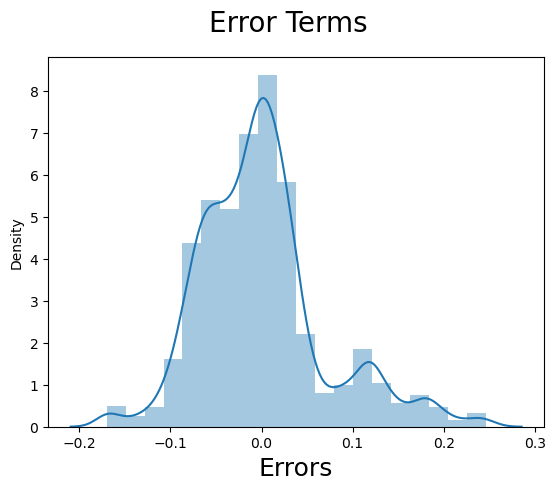

In [35]:
#Verificar con los errores como vimos la clase pasada
import seaborn as sns
import matplotlib.pyplot as plt 
y_train_total_UPDRS = result19.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_total_UPDRS), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [36]:
num_vars = ['subject', 'age', 'sex', 'test_time', 'motor_UPDRS','total_UPDRS',
            'Jitter(%)', 'Jitter(Abs)','Jitter:RAP','Jitter:PPQ5','Jitter:DDP',
            'Shimmer', 'Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:APQ11',
            'Shimmer:DDA','NHR','HNR','RPDE','DFA','PPE' ]
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test

,subject,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5851,1.000000,0.510204,0.0,0.021214,0.434780,0.459118,0.066707,0.142464,0.054643,0.052104,...,0.226333,0.144170,0.171674,0.190908,0.144170,0.070893,0.481334,0.603827,0.254491,0.405839
1598,0.243902,0.387755,0.0,0.312781,0.461496,0.359706,0.019536,0.035526,0.019753,0.020771,...,0.059587,0.048243,0.049249,0.048810,0.048243,0.005629,0.650652,0.294710,0.147265,0.178298
5075,0.878049,0.408163,1.0,0.732699,0.916370,0.835118,0.019536,0.024293,0.020306,0.020419,...,0.094666,0.073575,0.083778,0.060993,0.073554,0.012006,0.628672,0.289970,0.263240,0.096832
5236,0.902439,0.632653,0.0,0.409659,0.458015,0.451221,0.020549,0.030676,0.016799,0.018835,...,0.092263,0.068670,0.077235,0.082741,0.068649,0.006947,0.641098,0.265776,0.221057,0.161709
4235,0.731707,0.795918,0.0,0.271248,0.719000,0.529005,0.076931,0.146186,0.045043,0.075867,...,0.164344,0.118279,0.166525,0.161066,0.118238,0.023644,0.456704,0.423983,0.765761,0.460970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0.048780,0.428571,0.0,0.689696,0.675227,0.654838,0.013767,0.024564,0.014399,0.016370,...,0.028352,0.024401,0.022716,0.019254,0.024401,0.002921,0.715319,0.179951,0.159578,0.123152
309,0.048780,0.428571,0.0,0.530335,0.689934,0.601975,0.014070,0.026864,0.013476,0.015842,...,0.043248,0.034335,0.039617,0.035197,0.034294,0.003701,0.713469,0.350034,0.177917,0.121486
2577,0.439024,0.387755,0.0,0.587308,0.376010,0.408464,0.086750,0.139058,0.087133,0.092589,...,0.143681,0.113001,0.122244,0.097948,0.112981,0.024327,0.542882,0.366195,0.547630,0.377518
5833,1.000000,0.510204,0.0,0.254944,0.530883,0.551196,0.017512,0.038481,0.013661,0.013906,...,0.050937,0.036819,0.040526,0.045990,0.036819,0.010516,0.647918,0.500261,0.128984,0.133614


In [37]:
#Separar x de y
y_test = df_test.pop('total_UPDRS')
X_test = df_test

# Añadir variables
X_test_m19 = sm.add_constant(X_test)

# Quitar las mismas variables que quitamos en el training
X_test_m19 = X_test_m19.drop([ "age", "test_time","Jitter(%)", "Jitter(Abs)",
                              "Jitter:RAP","Jitter:PPQ5","Jitter:DDP","Shimmer",
                              "Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5",
                              "Shimmer:APQ11","Shimmer:DDA","NHR","HNR",
                              "RPDE","DFA","PPE" ], axis = 1)

# Hacer predicciones
y_pred_m19 = result19.predict(X_test_m19)

In [38]:
from sklearn.metrics import r2_score
#Observar los valores de r2
r2_score(y_true = y_test, y_pred = y_pred_m19)

0.898635833754887

Al realizar por medio de lasso pudimos notar que 